# De statistieken in het WK voetbal
Link naar GitHub page: https://deanvos.github.io/InfoVis/docs/home.html

## Introduction
In deze data story project worden de datasets van het Wereldkampioenschap (WK) van 2018 en 2022 geanalyseerd. Het WK voetbal is een van de meest prestigieuze toernooien in de wereld die maar één keer in de vier jaar wordt georganiseerd. In het project worden de datasets aandachtig geanalyseerd en vergeleken met elkaar om interessante bevindingen te verkrijgen. Met deze twee datasets kunnen we interessante visualisaties creëren om vervolgens inzicht te krijgen op bijvoorbeeld de prestaties en trends tussen deze twee toernooien. In deze data story project zullen we eerst het onderwerp beschrijven met de bijbehorende perspectieven. Vervolgens worden de datasets beschreven, daarnaast wordt er beschreven hoe de datasets zijn bewerkt en gefilterd. In het middendeel van de data story project worden er meerdere visualisaties gegeven die elk een eigen punt en argument illustreren. 

## Topic description
In de data story project staat het vergelijken van statistieken en prestaties van verschillende teams centraal. De datasets die worden gebruikt is de dataset van het WK voetbal van 2018, en de dataset van het WK voetbal 2022. Door de datasets te analyseren en verschillende visualisaties te maken is het mogelijk om te ontdekken welke factoren invloed hebben op het succes in het WK voetbal. De datasets bevatten heel veel variabelen en mogelijke invalshoeken. Niet alleen statistieken zoals schoten op doel of balbezit, maar ook gegevens zoals het aantal lange ballen, aantal pogingen/gelukte liniedoorbraken, etc.

## Dataset description and preprocessing
#### Dataset WK 2018
Link: https://www.kaggle.com/datasets/shikhar07/fifa-2018-dataset

Deze dataset bevat informatie over de prestaties van voetbalteams op het WK voetbal van 2018. Hierbij kan er aan de hand van 27 verschillende variabelen/kolommen gekeken worden naar de prestaties van de teams. Tijdens het WK van 2018 deden er 32 landen mee, waarvan de wedstrijdinformatie verdeeld is over 128 rijen. De gegevens zijn georganiseerd van eerste ronde tot laatste ronde. Zo wordt de winnaar, het balbezit en het aantal gele kaarten bijvoorbeeld benoemd. Daarnaast zijn er heel veel andere variabelen die we kunnen vergelijken, zoals op balbezit en gele/rode kaarten, schoten en doelpunten etc.

In de visualisaties zijn verschillende variabelen gebruikt uit deze dataset. De variabelen ‘aantal overtredingen’, ‘gele kaart’, ‘rode kaart’ en ‘gele & rode kaart’ komen vaak voor. Al de vier variabelen zijn discrete variabelen (ordinale schaal). Naast deze variabelen zijn de gebruikte variabelen ‘pasen’, ‘goals’, ‘pogingen’ en ‘% balbezit' ook discreet (ratioschaal). 

#### Dataset WK 2022
Link: https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset

Deze dataset bevat data over alle gespeelde voetbalwedstrijden die plaats hebben gevonden tijdens het WK 2022 in Qatar. Tijdens het WK van 2022 deden er, net zoals in 2018, 32 landen mee. De dataset bevat 64 rijen, waar informatie valt te vinden over de landen die tegen elkaar hebben gespeeld, de eindscore, tijdsduur en vele andere variabelen. De gegevens zijn georganiseerd van eerste ronde tot laatste ronde. Er valt bijvoorbeeld informatie te vinden over de landen die tegen elkaar hebben gespeeld, de eindscore, tijdsduur en vele andere variabelen. Niet alleen statistieken zoals schoten op doel of balbezit, maar ook gegevens zoals aantal lange ballen, aantal pogingen/gelukte liniedoorbraken, etc.

#### Preprocessing
Preprocessing: 
Stap 1: De dataset van het WK van 2018 heeft de kolommen: ‘Team’ en ‘Opponent’ om de teams mee aan te duiden. De dataset van het WK van 2022 heeft de kolommen: ‘team1’ en 'team 2' om de teams aan te duiden. Allereerst hebben we de kolomnamen van de 2018 dataset veranderd van ‘Team’ naar ‘team1’ en ‘Opponent’ naar ‘team2’.
- df_2018 = df_2018.rename(columns = {'Team': 'team1'})
- df_2018 = df_2018.rename(columns = {'Opponent': 'team2'})

Stap 2: Nu hebben deze twee kolommen in beide datasets dezelfde naam, op deze kolommen hebben we de datasets samengevoegd.
- merged_df = df_2022.merge(df_2018, on = ['team1', 'team2'], how = 'outer')

In [3]:
# Alle benodigde imports en datasets
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
wk2018 = pd.read_csv('FIFA 2018 Statistics.csv')
wk2022 = pd.read_csv('Fifa_world_cup_matches.csv')
wk_df = pd.read_csv('wk_merged_datasets.csv')

In [4]:
# totaal aantal overtredingen per WK
overtredingen_2018 = wk_df['Fouls Committed'].sum()
overtredingen_2022 = wk_df['fouls against team1'].sum() + wk_df['fouls against team2'].sum()

# donut chart maken
fig = go.Figure(data = [go.Pie(labels = ['WK 2018', 'WK 2022'],
                               values = [overtredingen_2018, overtredingen_2022], 
                               hole = 0.7)])
# titel
fig.update_layout(title = 'Figuur 1: Totaal aantal overtredingen per WK')

# plotten
fig.show()

Figuur 1 is een simpele donut chart die het totaal aantal overtredingen per WK weergeeft. Met de cursor kan je over de kleuren (WK's) zweven om het aantal overtredingen per WK te zien. Je krijgt dan het jaartal van het WK te zien, gevolgd door het aantal overtredingen en daarnaast krijg je het percentage te zien van het totaal aantal overtredingen. Het lijkt erop dat er in het WK van 2018 iets meer overtredingen zijn gemaakt dan in het WK van 2022.

In [5]:
# samenvoegen van rijen in de kolom 'Fouls Committed'
wedstrijden_samenvoegen = wk2018.groupby(wk2018.index // 2).agg({
    'Fouls Committed': 'sum'
}).reset_index(drop = True)

# kolom met overtredingen van 2018
overtredingen_2018 = wedstrijden_samenvoegen['Fouls Committed']
# kolommen met de overtredingen van 2022
overtredingen_2022 = wk_df['fouls against team1'] + wk_df['fouls against team2']

# Gegevens voor de boxplot
data = [go.Box(y = overtredingen_2018, name = 'WK 2018', marker_color = 'palegreen', boxmean=True),
        go.Box(y = overtredingen_2022, name = 'WK 2022', marker_color = 'powderblue', boxmean=True)]

# opmaak en titels
layout = go.Layout(
    title = 'Figuur 2: Overtredingen per jaar in cijfers',
    xaxis = dict(title = 'Jaar'),
    yaxis = dict(title = 'Aantal overtredingen'),
    showlegend = True)

# box plot maken
fig = go.Figure(data = data, layout = layout)
fig.show()

De box plot in figuur 2 geeft de statistieken wat betreft het aantal overtredingen per WK weer. In figuur 2 zie je twee box plots, deze box plots geven de trends weer wat betreft het aantal overtredingen per wedstrijd. De box plots geven een gedetailleerder beeld weer van het aantal overtredingen per wedstrijd. Je ziet gelijk dat er in het WK van 2018 over het algemeen meer overtredingen worden gemaakt. Het gemiddelde is hoger in 2018, daarnaast zijn de kwartielen en 'upper fence' hoger in 2018. Echter kan je ook zien dat er in het WK van 2022 drie outliers zijn (de drie blauwe stipjes boven in de grafiek). Deze outliers zijn te verklaren, want dit zijn de felle finale wedstrijden, de twee kwartfinales (punt 46 en 48) en de finale (punt 45) om precies te zijn.

In [6]:
import plotly.graph_objects as go

# alle gele kaarten
yellow_cards_2022 = int(wk_df['yellow cards team1'].sum() + wk_df['yellow cards team2'].sum())
yellow_cards_2018 = int(wk_df['Yellow Card'].sum())
# alle rode kaarten
red_cards_2022 = int(wk_df['red cards team1'].sum() + wk_df['red cards team2'].sum())
red_cards_2018 = int(wk_df['Red'].sum() + wk_df['Yellow & Red'].sum())

# lijsten met alle jaren en kaarten
years = ['2018', '2022']
yellow_cards = [yellow_cards_2018, yellow_cards_2022]
red_cards = [red_cards_2018, red_cards_2022]

# histogram plotten
data = [
    # gele kaarten
    go.Bar(x = years, 
           y = yellow_cards,
           text = yellow_cards, 
           textposition = 'auto', 
           name = ' Gele kaarten', 
           marker = dict(color = '#FFD700')),
    # rode kaarten
    go.Bar(x = years, 
           y = red_cards, 
           text = red_cards,
           textposition = 'auto',
           name = 'Rode kaarten', 
           marker = dict(color = '#FF0000'))]

# titel en opmaak
layout = go.Layout(
    title = 'Figuur 3: Aantal gele en rode kaarten per jaar',
    xaxis = dict(title = 'Jaar', type='category', showgrid = False),
    yaxis = dict(title = 'Aantal kaarten', showgrid = False),
    barmode = 'group',
    showlegend = True)

# grafiek maken
fig = go.Figure(data = data, layout = layout)
fig.show()


Figuur 2 geeft een figuur met vier staven, elke staaf representeerd een kleur kaart per jaar. Als je met de cursor over de staven gaat, geeft de plot een jaartal gevolgd door het aantal rode/gele kaarten. Daarnaast zijn het aantal kaarten boven de staven vermeld. Figuur 2 laat zien dat er zowel in het WK van 2018 als in het WK van 2022 vier rode kaarten zijn gegeven. Daarnaast zijn er in het WK van 2022 iets meer gele kaarten (226) gegeven dan in het WK van 2018 (217).

In [7]:
selected_columns2022 = wk_df.loc[:, ['fouls against team1', 'fouls against team2', 'category']]

# Verwijder NaN-waarden in de 'category'-kolom
selected_columns2022 = selected_columns2022.dropna(subset=['category'])

# data voor groepsfase + knock-outfase
groepsfase = selected_columns2022[selected_columns2022['category'].str.contains('Group')]
knockoutfase = selected_columns2022[~selected_columns2022['category'].str.contains('Group')]

# Totaal aantal overtredingen per fase
groepsfase_overtredingen = groepsfase['fouls against team1'] + groepsfase['fouls against team2']
knockoutfase_overtredingen = knockoutfase['fouls against team1'] + knockoutfase['fouls against team2']

# Staafdiagram
fig = go.Figure()
fig.add_trace(go.Bar(x = groepsfase['category'], y = groepsfase_overtredingen, name = 'Groepsfase'))
fig.add_trace(go.Bar(x = knockoutfase['category'], y = knockoutfase_overtredingen, name = 'Knock-outfase'))

fig.update_layout(title = 'Figuur 4: Aantal overtredingen per groepsfase en ronde (2022)',
                  xaxis_title = 'Fase',
                  yaxis_title = 'Aantal overtredingen')

fig.show()

Figuur 3 laat goed zien hoeveel overtredingen er per groep en ronde zijn gemaakt in het WK van 2022. Je kan met de cursor over de staven om het aantal overtredingen per wedstrijd te krijgen. Elke staaf is opgedeeld in een aantal vlakken, deze vlakken representeren een wedstrijd (elke staaf bijvoorbeeld in de groepsfase heeft zes vlakken, die staan voor zes wedstrijden). De y-as geeft het aantal overtredingen weer, de x-as geeft de fase/ronde van het WK aan.

In [8]:
selected_columns2022 = wk_df.loc[:, ['fouls against team1', 'fouls against team2', 'category']]
selected_columns2022 = selected_columns2022.dropna(subset=['category'])

# waardes per ronde/fase
ronde_data = selected_columns2022.groupby('category').sum()
ronde_wedstrijden = selected_columns2022['category'].value_counts()

# gemiddeld aantal overtredingen per ronde bekijken (totaal aantal overtredingen ronde : aantal wedstrijden ronde)
gemiddeld_overtredingen_per_ronde = ronde_data['fouls against team1'] + ronde_data['fouls against team2']
gemiddeld_overtredingen_per_ronde /= ronde_wedstrijden
ronde_labels = ronde_data.index

# volgorde van de staven, in 'toernooivolgorde'
custom_sort_order = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H',
                     'Round of 16', 'Quarter-final', 'Semi-final', 'Play-off for third place', 'Final']

# de labels sorteren op bovenstaande volgorde
ronde_labels_sorted = sorted(ronde_labels, key=lambda x: custom_sort_order.index(x))
gemiddeld_overtredingen_per_ronde_sorted = [gemiddeld_overtredingen_per_ronde[ronde] for ronde in ronde_labels_sorted]

# bereken gemiddeld aantal overtredingen per wedstrijd van het hele toernooi
gemiddeld_overtredingen_per_wedstrijd = gemiddeld_overtredingen_per_ronde.mean()

# histogram maken
fig = go.Figure()
fig.add_trace(go.Bar(x = ronde_labels_sorted,
                     y = gemiddeld_overtredingen_per_ronde_sorted,
                     name = 'Gemiddeld overtredingen per ronde',
                     marker = dict(color='peachpuff')))

# horizontale lijn die het gemiddelde aantal overtredingen weergeeft, van het hele toernooi
fig.add_shape(type='line',
              x0 = ronde_labels_sorted[0],
              y0 =  gemiddeld_overtredingen_per_wedstrijd,
              x1 = ronde_labels_sorted[-1],
              y1 = gemiddeld_overtredingen_per_wedstrijd,
              line = dict(color = 'indianred', dash = 'dash'))

# titel en andere opmaak
fig.update_layout(title = 'Figuur 5: Gemiddeld aantal overtredingen per ronde (2022)',
                  xaxis_title = 'Ronde',
                  yaxis_title = 'Gemiddeld aantal overtredingen per wedstrijd')
fig.show()

Figuur 5 is een histogram die iets meer de diepte in gaat dan figuur 4, want figuur 5 visualiseert het gemiddelde aantal overtredingen per wedstrijd per ronde. Als je met de cursor over de staven zweeft, krijg je de geselecteerde fase van het toernooi, gevolgd door het gemiddelde aantal overtredingen per wedstrijd in die ronde. De y-as geeft het (gemiddelde) aantal overtredingen per wedstrijd, en op de x-as staan de verschillende fases/rondes, dus in groep C werden er gemiddeld 30 overtredingen per wedstrijd gemaakt. Daarnaast is er een gestippelde rode lijn die het gemiddelde aantal overtredingen per wedstrijd van het gehele toernooi representeert.

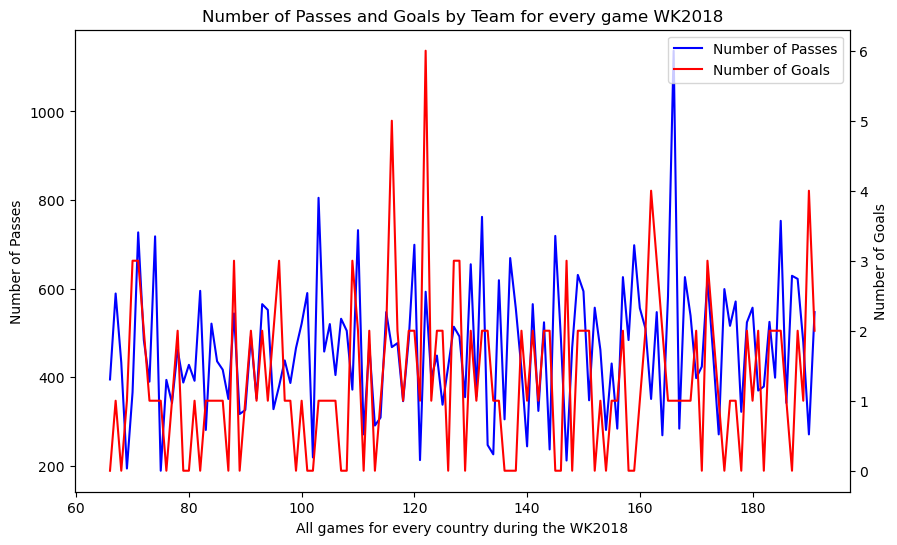

In [9]:
data = wk_df

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the pass accuracy on the first y-axis
ax1.plot(range(66, len(data)), wk_df.iloc[66:,]['Passes'], color='blue', label='Number of Passes')

# Plot the number of goals on the second y-axis
ax2.plot(range(66, len(data)), wk_df.iloc[66:,]['Goal Scored'], color='red', label='Number of Goals')

# Set the y-axis labels
ax1.set_ylabel('Number of Passes')
ax2.set_ylabel('Number of Goals')

# Set the x-axis label and ticks
ax1.set_xlabel('All games for every country during the WK2018')
# ax1.set_xticks(range(66, len(sorted_df)))
# ax1.set_xticklabels(sorted_df.iloc[66:,]['team1'], rotation=45)

# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
lines += ax2_lines
labels += ax2_labels
plt.legend(lines, labels)

# Set the title
plt.title('Number of Passes and Goals by Team for every game WK2018')

# Display the plot
plt.show()


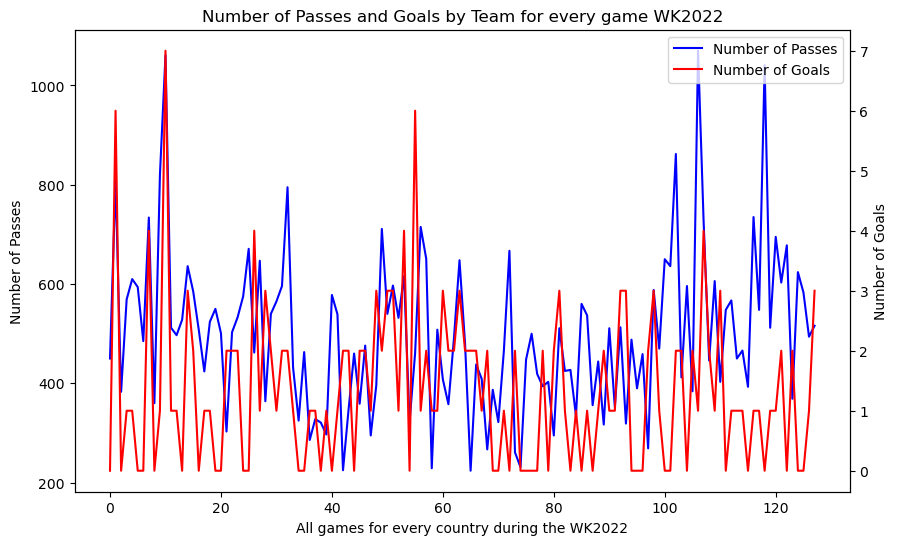

In [10]:
data = wk_df

# Select the first 64 team names and pass counts from team1 and passes team1 columns
team1_names = data['team1'].tolist()[:64]
team1_passes = data['passes team1'].tolist()[:64]

# Select the first 64 team names and pass counts from team2 and passes team2 columns
team2_names = data['team2'].tolist()[:64]
team2_passes = data['passes team2'].tolist()[:64]

# Select the first 64 goals conceded by team2 for team1 names
team1_goals_conceded = data['conceded team2'].tolist()[:64]

# Select the first 64 goals conceded by team1 for team2 names
team2_goals_conceded = data['conceded team1'].tolist()[:64]

# Combine the team names and pass counts from both teams
all_team_names = team1_names + team2_names
all_passes = team1_passes + team2_passes

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the passes on the first y-axis
ax1.plot(all_passes, color='blue', label='Number of Passes')
ax1.set_ylabel('Number of Passes')

# Combine the goals conceded data for both teams
all_goals_conceded = team1_goals_conceded + team2_goals_conceded

# Plot the combined goals conceded data on the second y-axis
ax2.plot(all_goals_conceded, color='red', label='Number of Goals')
ax2.set_ylabel('Number of Goals')

# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
lines += ax2_lines
labels += ax2_labels
plt.legend(lines, labels)

# Set the x-axis label
ax1.set_xlabel('All games for every country during the WK2022')

# Set the title
plt.title('Number of Passes and Goals by Team for every game WK2022')

# Display the plot
plt.show()

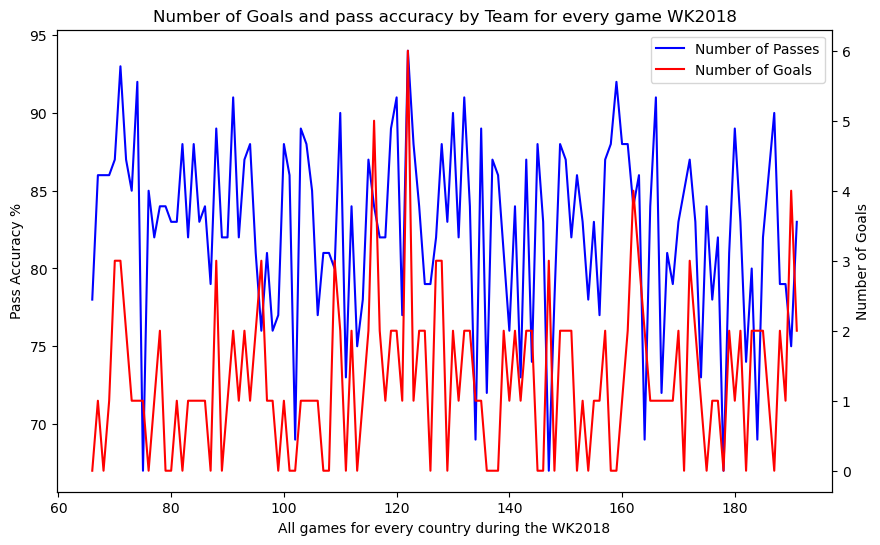

In [11]:
data = wk_df

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the pass accuracy on the first y-axis
ax1.plot(range(66, len(data)), wk_df.iloc[66:,]['Pass Accuracy %'], color='blue', label='Number of Passes')

# Plot the number of goals on the second y-axis
ax2.plot(range(66, len(data)), wk_df.iloc[66:,]['Goal Scored'], color='red', label='Number of Goals')

# Set the y-axis labels
ax1.set_ylabel('Pass Accuracy %')
ax2.set_ylabel('Number of Goals')

# Set the x-axis label and ticks
ax1.set_xlabel('All games for every country during the WK2018')
# ax1.set_xticks(range(66, len(sorted_df)))
# ax1.set_xticklabels(sorted_df.iloc[66:,]['team1'], rotation=45)

# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
lines += ax2_lines
labels += ax2_labels
plt.legend(lines, labels)

# Set the title
plt.title('Number of Goals and pass accuracy by Team for every game WK2018')

# Display the plot
plt.show()

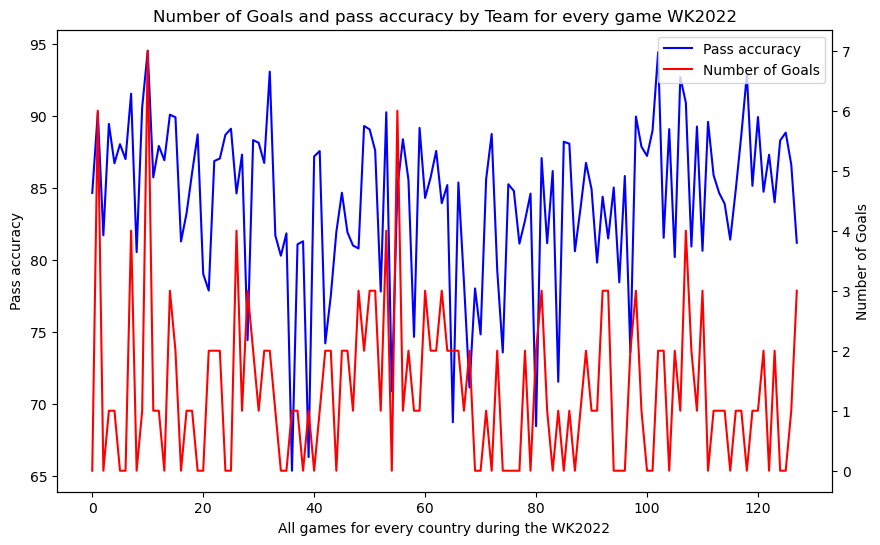

In [12]:
data = wk_df

# Calculate the pass completion percentage
wk_df["pass_completion_percentage"] = (wk_df['passes completed team1'] / wk_df['passes team1']) * 100
# Calculate the pass completion percentage
wk_df["pass_completion_percentage2"] = (wk_df['passes completed team2'] / wk_df['passes team2']) * 100

# Select the first 64 team names and pass counts from team1 and passes team1 columns
team1_names = data['team1'].tolist()[:64]
team1_passes = data['pass_completion_percentage'].tolist()[:64]

# Select the first 64 team names and pass counts from team2 and passes team2 columns
team2_names = data['team2'].tolist()[:64]
team2_passes = data['pass_completion_percentage2'].tolist()[:64]

# Select the first 64 goals conceded by team2 for team1 names
team1_goals_conceded = data['conceded team2'].tolist()[:64]

# Select the first 64 goals conceded by team1 for team2 names
team2_goals_conceded = data['conceded team1'].tolist()[:64]

# Combine the team names and pass counts from both teams
all_team_names = team1_names + team2_names
all_passes = team1_passes + team2_passes

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the passes on the first y-axis
ax1.plot(all_passes, color='blue', label='Pass accuracy')
ax1.set_ylabel('Pass accuracy')

# Combine the goals conceded data for both teams
all_goals_conceded = team1_goals_conceded + team2_goals_conceded

# Plot the combined goals conceded data on the second y-axis
ax2.plot(all_goals_conceded, color='red', label='Number of Goals')
ax2.set_ylabel('Number of Goals')

# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
lines += ax2_lines
labels += ax2_labels
plt.legend(lines, labels)

# Set the x-axis label
ax1.set_xlabel('All games for every country during the WK2022')

# Set the title
plt.title('Number of Goals and pass accuracy by Team for every game WK2022')

# Display the plot
plt.show()

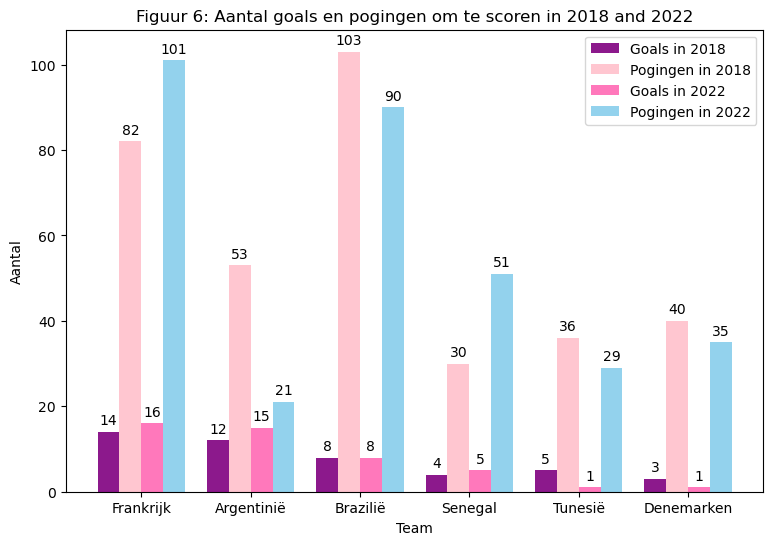

In [13]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
teams = ['Frankrijk', 'Argentinië', 'Brazilië', 'Senegal', 'Tunesië', 'Denemarken']

goals_2018 = [14, 12, 8, 4, 5, 3]

goals_2022 = [16, 15, 8, 5, 1, 1]

pogingen_2018 = [82, 53, 103, 30, 36, 40]

pogingen_2022 = [101, 21, 90, 51, 29, 35]

fig, ax = plt.subplots(figsize=(9, 6))

bar_width = 0.2

opacity = 0.9

index = np.arange(len(teams))

goals2018 = plt.bar(index,goals_2018,bar_width,alpha=opacity,color='purple',label='Goals in 2018')

autolabel(goals2018)

pogingen2018 = plt.bar(index + bar_width,pogingen_2018, bar_width,alpha=opacity,color='pink', label='Pogingen in 2018')

autolabel(pogingen2018)

goals2022 = plt.bar(index + 2 * bar_width,goals_2022, bar_width,alpha=opacity,color='#FF69B4',label='Goals in 2022')

autolabel(goals2022)

pogingen2022 = plt.bar(index + 3 * bar_width, pogingen_2022, bar_width,alpha=opacity,color='#87CEEB',label='Pogingen in 2022')

autolabel(pogingen2022)

# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')

plt.xlabel('Team')

plt.ylabel('Aantal')

plt.title('Figuur 6: Aantal goals en pogingen om te scoren in 2018 and 2022')

plt.xticks(index + 1.5 * bar_width, teams)

plt.legend()

plt.show()


(Figuur 5 is nog gehardcoded, maar daar wordt aan gewerkt.) Figuur 5 geeft een goed beeld van het aantal pogingen en doelpunten van verschillende teams, zowel voor het WK 2018 als het WK 2022.

In [14]:
import plotly.graph_objects as go
import pandas as pd

# relevante variabelen
variabelen = ['Goal Scored', 'Ball Possession %', 'Attempts']
scatter_df = wk_df[variabelen]

# scatterplot matrix
fig = go.Figure(data = go.Splom(
                dimensions = [dict(label = var, values = scatter_df[var]) for var in variabelen],
                diagonal = dict(visible = False),
                showupperhalf = False,
                marker =  dict(color = wk_df['Goal Scored'], colorscale = 'Viridis', size = 6,
                colorbar = dict(title = 'Aantal Doelpunten'))))

# titel en andere opmaak toevoegen
fig.update_layout(
    title = 'Figuur 7: Correlatie Scatterplot',
    height= 900,
    width = 900)

# Scatterplot weergeven
fig.show()
